# Feature Distribution
This notebook investigates the probability distribution of each variable in the dataset "risk_factors_cervical_cancer.csv" for cervical cancer patients.

When applying the causal inference algorithm to a dataset, it is important to make sure that the distribution of the input variables is not biased against the target variables in the dataset as a preparatory step. Causal inference is a method of deriving causal relationships based on the independent probability distributions between input and target variables. If the data set is biased, the target variable will be dependent on the input variable, and the data set will not be able to extract causal relationships successfully. Therefore, this notebook analyzes the prerequisites of causal inference, confirming the distribution of the data set.

In [1]:
# import pandas and matplotlib for converting and visualizing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# install ETL
from cervical_cancer import CervicalCancer


In [2]:
'''
Dataset loading: the dataset has following columns.
Enplanatory varibales
0:Age, 1:Number of sexual partners, 2:First sexual intercourse, 3:Num of pregnancies, 4:Smokes, 
5:Smokes (years), 6:Smokes (packs/year), 7:Hormonal Contraceptives, 8:Hormonal Contraceptives (years), 9:IUD, 
10:IUD (years), 11:STDs, 12:STDs (number), 13:STDs:condylomatosis, 14:STDs:cervical condylomatosis, 
15:STDs:vaginal condylomatosis, 16:STDs:vulvo-perineal condylomatosis, 17:STDs:syphilis, 18:STDs:pelvic inflammatory disease, 19:STDs:genital herpes, 
20:STDs:molluscum contagiosum, 21:STDs:AIDS, 22:STDs:HIV, 23:STDs:Hepatitis B, 24:STDs:HPV, 
25:STDs: Number of diagnosis, 26:STDs: Time since first diagnosis, 27:STDs: Time since last diagnosis, 28:Dx:Cancer, 29:Dx:CIN
30:Dx:HPV, 31:Dx

Target varibales
32:Hinselmann, 33:Schiller, 34:Citology, 35:Biopsy

'''
# load dataset
cervical_cancer = CervicalCancer(data_path='data', file='risk_factors_cervical_cancer.csv', mode='dataframe')

# show full dataset
cervical_cancer.dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,True,0.0,0.0,True,0.00,True,...,4.0,3.0,False,False,False,False,False,False,False,False
1,15,1.0,14.0,1.0,True,0.0,0.0,True,0.00,True,...,4.0,3.0,False,False,False,False,False,False,False,False
2,34,1.0,14.0,1.0,True,0.0,0.0,True,0.00,True,...,4.0,3.0,False,False,False,False,False,False,False,False
3,52,5.0,16.0,4.0,True,37.0,37.0,True,3.00,True,...,4.0,3.0,True,False,True,False,False,False,False,False
4,46,3.0,21.0,4.0,True,0.0,0.0,True,15.00,True,...,4.0,3.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,True,0.0,0.0,True,0.00,True,...,4.0,3.0,False,False,False,False,False,False,False,False
854,32,2.0,19.0,1.0,True,0.0,0.0,True,8.00,True,...,4.0,3.0,False,False,False,False,False,False,False,False
855,25,2.0,17.0,0.0,True,0.0,0.0,True,0.08,True,...,4.0,3.0,False,False,False,False,False,False,True,False
856,33,2.0,24.0,2.0,True,0.0,0.0,True,0.08,True,...,4.0,3.0,False,False,False,False,False,False,False,False


In [3]:
# show all column names of input variables
cervical_cancer.dataset.columns.values[1:33]

array(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'Hinselmann'], dtype=object)

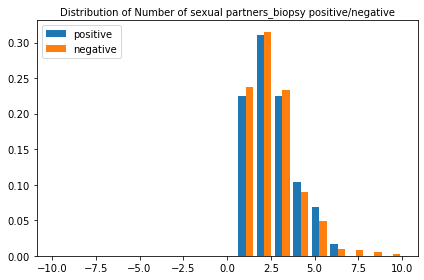

c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


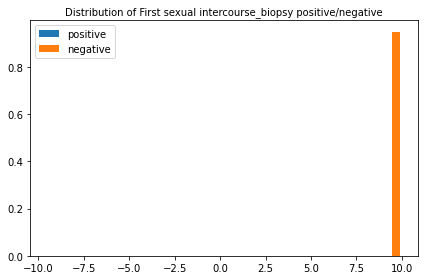

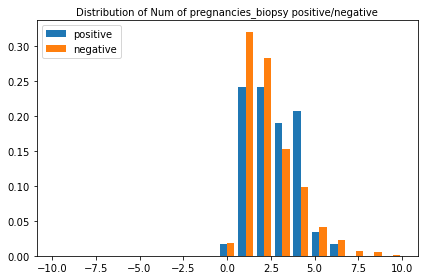

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


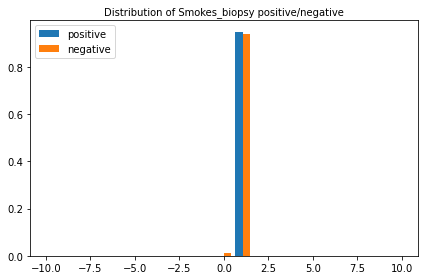

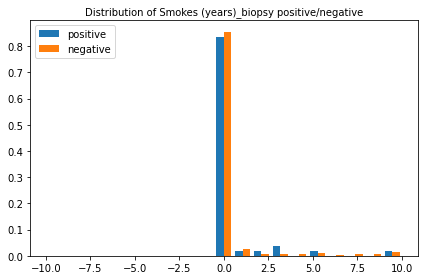

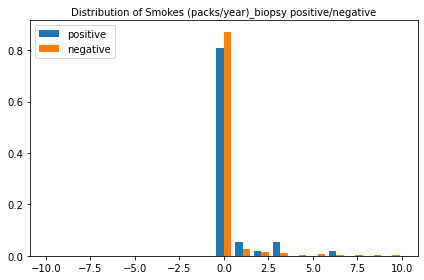

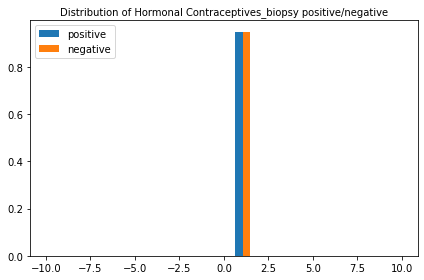

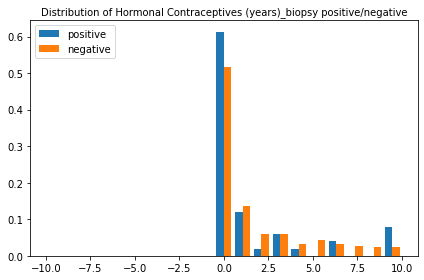

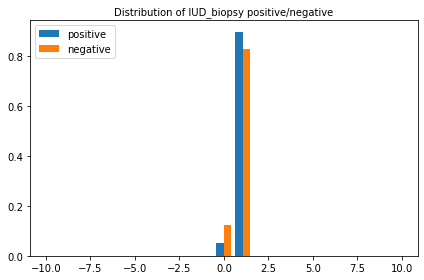

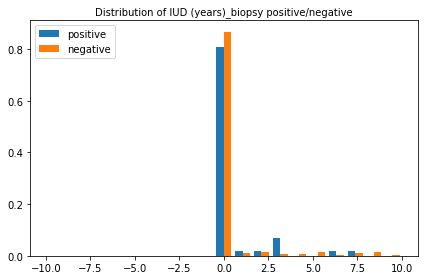

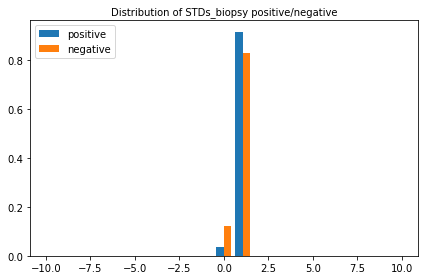

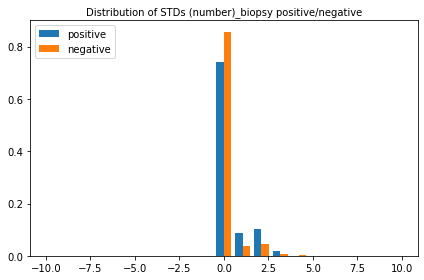

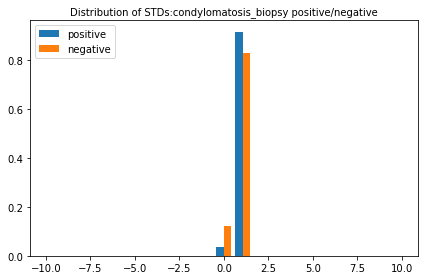

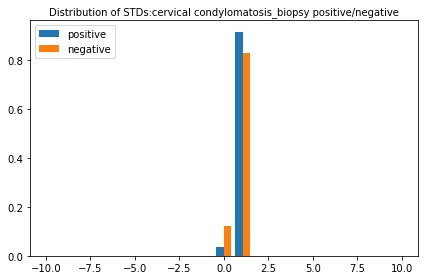

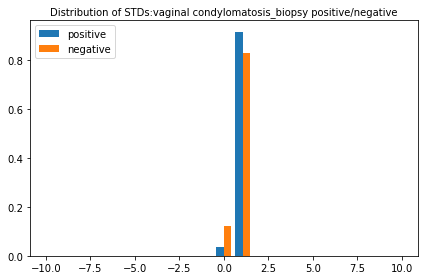

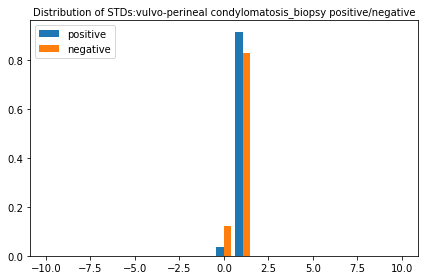

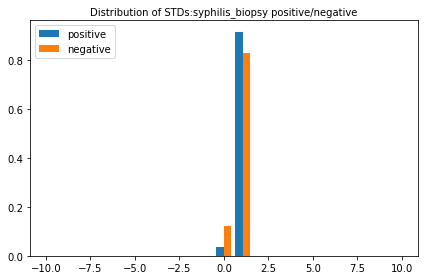

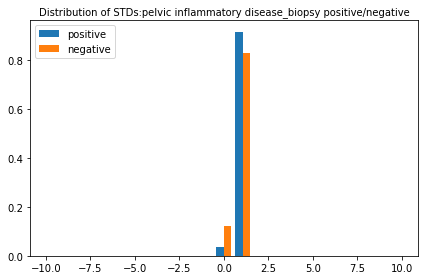

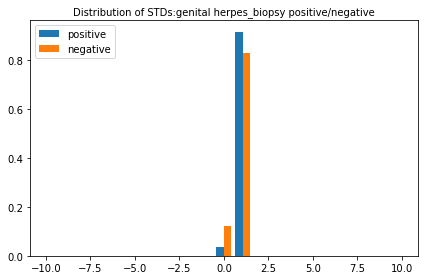

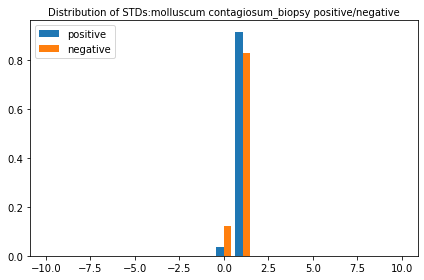

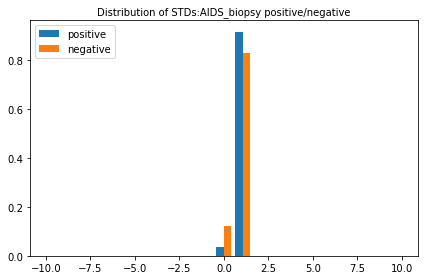

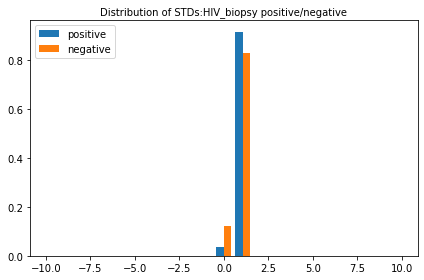

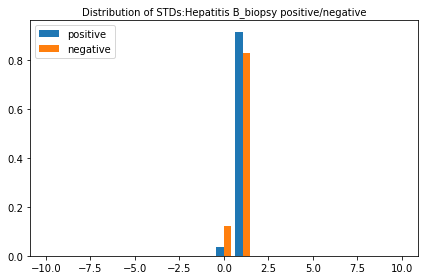

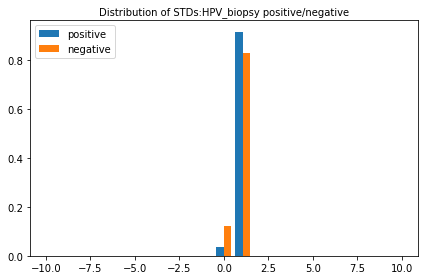

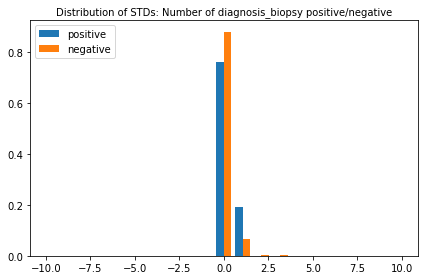

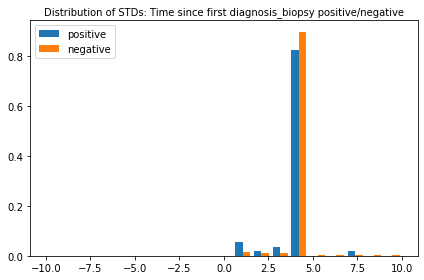

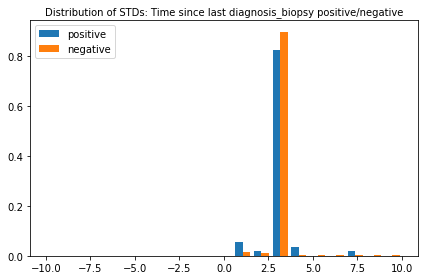

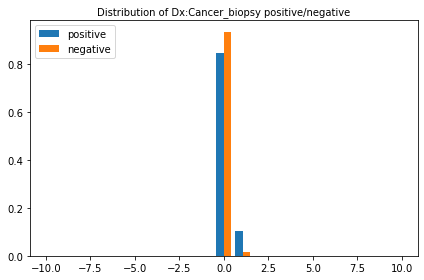

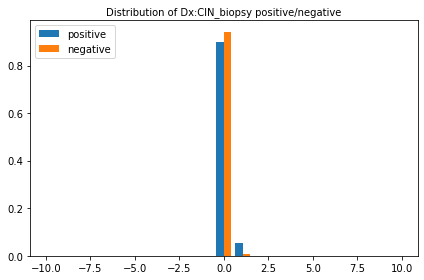

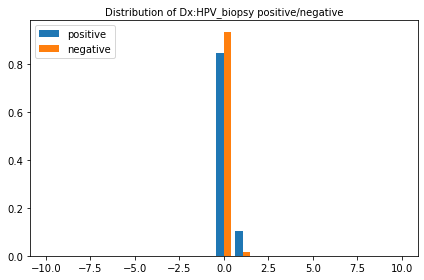

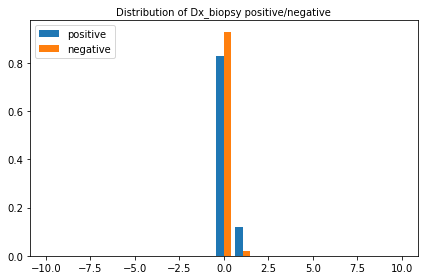

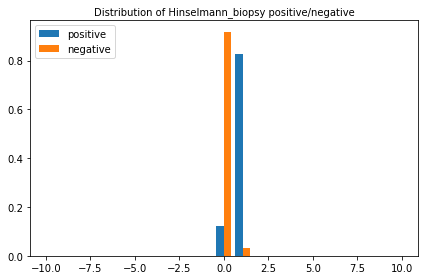

In [4]:
# stratify the dataset by target varibale "Biopsy"
# we have positive or negative data
biopsy_positive = cervical_cancer.dataset[cervical_cancer.dataset['Biopsy'] == 1]
biopsy_negative = cervical_cancer.dataset[cervical_cancer.dataset['Biopsy'] == 0]


# set the configuration color and width
colors=['blue', 'red']
width = 0.4
fig = plt.figure()
for feature in cervical_cancer.dataset.columns[1:33]:
    bins = np.linspace(-10, 10, 20)
    plt.hist([biopsy_positive[feature], biopsy_negative[feature]], bins, density=True, label=['positive', 'negative'])
    plt.legend(loc='upper left')
    plt.title('Distribution of {}_biopsy positive/negative'.format(feature), fontsize=10)
    plt.tight_layout()
    plt.show()    

## Conclusion
Since the data after stratification did not reveal any major differences in sample distribution in each group, we conclude that the model can be implemented through causal inference.